In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

In [2]:
import os
import struct
import numpy as np
from utils import *



In [3]:
import sklearn
from sklearn.manifold import TSNE
from time import time

In [4]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [5]:
from glow import thops
from glow import modules
from glow import models
from glow.config import JsonConfig
import cv2

glow/utils.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 1065, in start
    

In [6]:
# negative
path_total = '/home/hyshuai/workspace/dataset/images_background'

dataset_negative = []
for path_p in os.listdir(path_total):
        path_p_join = os.path.join(path_total,path_p)
        for path_c in os.listdir(path_p_join):
            path_real = os.path.join(path_p_join,path_c)
            class_name = path_real
            # image_paths = get_image_paths(path_real)
            images = get_images_frompath(path_real)
            print(class_name," : ",len(images))
            dataset_negative.append(ImageObject(class_name,images))

/home/hyshuai/workspace/dataset/images_background/Grantha/character42  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character08  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character13  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character35  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character39  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character11  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character19  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character01  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character04  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character10  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character07  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character28  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character30  :  20

/home/hyshuai/workspace/dataset/images_background/Tifinagh/character04  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character10  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character07  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character28  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character30  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character15  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character40  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character44  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character22  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character05  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character03  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/character27  :  20
/home/hyshuai/workspace/dataset/images_background/Tifinagh/chara

/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character11  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character01  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character04  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character10  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character07  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character05  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character03  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character12  :  20
/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character02  :  20
/

/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character03  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character12  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character21  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character02  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character17  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character23  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character14  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character18  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character20  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character09  :  20
/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character16  :  20
/home/hyshuai/workspa

/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character40  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character22  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character05  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character03  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character27  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character12  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character36  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character21  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character32  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character02  :  20
/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character24  :  20

/home/hyshuai/workspace/dataset/images_background/Futurama/character23  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character14  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character18  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character26  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character25  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character20  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character09  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character16  :  20
/home/hyshuai/workspace/dataset/images_background/Futurama/character06  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character42  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character08  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character13  :  20
/home/hyshuai/workspace/dataset

/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character17  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character23  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character49  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character50  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character14  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character31  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character37  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character18  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character38  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character26  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character45  :  20
/home/hyshuai/workspa

In [7]:
# positive

path_positive_total = '/home/hyshuai/workspace/dataset/images_evaluation'
class_name_list = []
for path_p in os.listdir(path_positive_total):
    path_p_join = os.path.join(path_positive_total,path_p)
    for path_c in os.listdir(path_p_join):
        path_real = os.path.join(path_p_join,path_c)
        class_name = path_real
        class_name_list.append(str(class_name))

# class_name = np.array(class_name)
# print(class_name_list)
np.random.seed(66) # 切换类试下
shufindex = np.random.permutation(len(class_name_list))
# print(shufindex)
class_positive = np.array(class_name_list)[shufindex][:20] #取20个类做测试 20-way
print(class_positive)

dataset_train_positive =[]
dataset_test_positive = []
for class_path in class_positive :
    images = get_images_frompath_random(class_path) # 固定随机抽样是否有问题
    print(class_path, " : ", len(images))
    dataset_train_positive.append(ImageObject(class_path, images[:5])) # 5-shot
    dataset_test_positive.append(ImageObject(class_path, images[5:]))



print(len(dataset_train_positive[2].imgs))
print(len(dataset_test_positive[2].imgs))






    

['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35'
 '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24'
 '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15'
 '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24'
 '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14'
 '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22'
 '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21'
 '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14'
 '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16'
 '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11'
 '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16'
 '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23'
 '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24'
 '/home/hyshuai/workspace/dataset/

/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07  :  20
['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_18.png', '/home/hyshuai/workspace/dataset/images

In [8]:
# label:

class_total_num = len(dataset_negative) + len(dataset_train_positive)
print("class_total = ",class_total_num)
np.random.seed(66) 
shufindex = np.random.permutation(class_total_num)
for index, value in enumerate(dataset_negative):
    value.label = shufindex[index]
    print(value.name,  value.label)

for index, value in enumerate(dataset_train_positive):
    value.label = shufindex[index+len(dataset_negative)]
    dataset_test_positive[index].label = shufindex[index+len(dataset_negative)]
    print(value.name, value.label)

class_total =  984
/home/hyshuai/workspace/dataset/images_background/Grantha/character42 847
/home/hyshuai/workspace/dataset/images_background/Grantha/character08 118
/home/hyshuai/workspace/dataset/images_background/Grantha/character13 364
/home/hyshuai/workspace/dataset/images_background/Grantha/character35 239
/home/hyshuai/workspace/dataset/images_background/Grantha/character39 76
/home/hyshuai/workspace/dataset/images_background/Grantha/character11 936
/home/hyshuai/workspace/dataset/images_background/Grantha/character19 621
/home/hyshuai/workspace/dataset/images_background/Grantha/character01 275
/home/hyshuai/workspace/dataset/images_background/Grantha/character04 121
/home/hyshuai/workspace/dataset/images_background/Grantha/character10 312
/home/hyshuai/workspace/dataset/images_background/Grantha/character07 380
/home/hyshuai/workspace/dataset/images_background/Grantha/character28 298
/home/hyshuai/workspace/dataset/images_background/Grantha/character30 727
/home/hyshuai/worksp

In [9]:
# test_class_index = [159, 687, 486, 843, 27, 253, 909, 295, 912, 714, 307, 661, 858, 79, 717, 122, 51, 631, 828, 20]
test_class_index = [data.label for data in dataset_train_positive]
print(test_class_index)

[159, 687, 486, 843, 27, 253, 909, 295, 912, 714, 307, 661, 858, 79, 717, 122, 51, 631, 828, 20]


In [10]:
# print(dataset_test_positive[0].name)
# np.random.shuffle(dataset_test_positive)
# print(dataset_test_positive[0].name)
# imgs_show(np.squeeze( dataset_test_positive[0].imgs),1,5) 
# imgs_show(np.squeeze(dataset_negative[1].imgs),4,5)


In [11]:
# print(dataset_negative[0].imgs[2].shape)
# # print(im[15])
# # print(im.shape)
# print(dataset_negative[0].imgs[0].shape)
x = [data.imgs for data in dataset_train_positive] 
print(x[0][0].shape)
img_show(np.squeeze(x[0]))
img_show(np.squeeze(x[1]))
img_show(np.squeeze(x[2]))
img_show(np.squeeze(x[3]))
img_show(np.squeeze(x[4]))

(1, 32, 32)


NameError: name 'img_show' is not defined

In [12]:

def get_next_perfect(dataset_train_positive,dataset_negative,p_size,n_size):
    """
    final batch_size = p_size + n_size * 2
    every dataset_negative should have same imgs leng
    """
    #shuffle
    np.random.shuffle(dataset_train_positive)
    np.random.shuffle(dataset_negative)
    for data in dataset_negative:
        np.random.shuffle(data.imgs)
    for data in dataset_train_positive:
        np.random.shuffle(data.imgs)
    
    
    batch_negative = n_size * 2
#     print('batch_negative ',batch_negative)
    len_n_class = len(dataset_negative)
#     print('len_n_class ',len_n_class)
    len_p_class = len(dataset_train_positive)
#     print('len_p_class ',len_p_class)
    len_n_imgs = len(dataset_negative[0].imgs)
#     print('len_n_imgs ',len_n_imgs)
    len_p_imgs = len(dataset_train_positive[0].imgs)
    
    negative_number = 0
    
    
#     shuffindex = np.random.permutation(len_n)
# #     print(shuffindex)
#     np.random.shuffle(dataset_train_positive)
#     np.random.shuffle(dataset_negative)
    
    for data in dataset_negative:
        negative_number += len(data.imgs)
#         np.random.shuffle(data.imgs)
#     print('negative_number ',negative_number)
    batch_total = negative_number  // batch_negative
#     print('batch_total ',batch_total)
    i_n_class = 0
    i_n_img = 0
    i_p_class = 0
    i_p_img = 0
    
    
    
        
    
    for b in range(batch_total):
        train_x =[]
        train_y = []
        create_negative_imgs = 0
        while create_negative_imgs <= (batch_total * batch_negative) and create_negative_imgs < batch_negative:
            
            # while #如果一次循环没够，需要再次循环
            if i_n_class >= len_n_class:
                    i_n_class = 0
                    i_n_img +=1
                    if (i_n_img+1) *2 >len_n_imgs:
                        i_n_img = 0
#                     print('if i_n_class >= len_n_class i_n_class ',i_n_class)
#                     print('if i_n_class >= len_n_class i_n_img ',i_n_img)
            
            for i in range(i_n_class,len_n_class):
                    
#                 print('for i in range(i_n_class i_n_class ',i_n_class)
#                 print('for i in range(i_n_class i_n_img ',i_n_img)
                train_x += dataset_negative[i_n_class].imgs[i_n_img * 2 : (i_n_img+1) *2]
                train_y += [dataset_negative[i_n_class].label] * 2
                
                i_n_class+=1
                if i_n_class >= len_n_class:
                    i_n_class = 0
                    i_n_img +=1
                    if (i_n_img+1) *2 > len_n_imgs:
                        i_n_img = 0
#                     print('if i_n_class >= len_n_class i_n_class ',i_n_class)
#                     print('if i_n_class >= len_n_class i_n_img ',i_n_img)
            
                create_negative_imgs +=2
                if create_negative_imgs >= batch_negative:
#                     print("create_negative_imgs ok ",create_negative_imgs)
                    break
                    
                
        create_positive_imgs = 0    
        while create_positive_imgs < p_size:
            for i in range(i_p_class,len_p_class):
#                 print('for i in range(i_p_class     ',i_p_class)
#                 print('for i in range(i_p_img  ',i_p_img)
                
                train_x += dataset_train_positive[i_p_class].imgs[i_p_img:(i_p_img +1)]
                train_y += [dataset_train_positive[i_p_class].label]
                
                i_p_class+=1
                if i_p_class >= len_p_class:
                    i_p_class = 0
                    i_p_img +=1
                    if (i_p_img +1) > len_p_imgs:
                        i_p_img = 0
#                     print('if i_p_class >= len_p_class i_p_class ',i_p_class)
#                     print('if i_p_class >= len_p_class i_p_img ',i_p_img)
                
                create_positive_imgs+=1
                if create_positive_imgs >= p_size:
#                     print("create_positive_imgs ok ",create_positive_imgs)
                    break
        
        shuffindex_out = np.random.permutation(len(train_y))
#         print(train_x[0].shape)
        train_x = np.stack(train_x,axis = 0)
#         print('after concat : ',train_x[0].shape)
        train_x = train_x[shuffindex_out]
        train_y = np.array(train_y)[shuffindex_out]
        
        yield train_x,train_y  

In [13]:
# dataaaaaaa = get_next_perfect(dataset_train_positive,dataset_negative,8,126)
# for x ,y in dataaaaaaa:
#     print(y)
#     print('x o shape ' ,x.shape,y.shape)
#     print("one batch is over")


In [14]:
def getnext_test(dataset_test_positive,test_class_index):
    
    for data in dataset_test_positive:
        x = np.stack(data.imgs,axis =0)
        y = np.array([test_class_index.index(data.label)] * len(data.imgs))
        yield x,y

In [15]:
# dataaaaaaa = getnext_test(dataset_test_positive,test_class_index)
# for x ,y in dataaaaaaa:
#     print(y)
#     print(x.shape,y.shape)

In [16]:
def imgs_show_norm(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        min = np.min(img)
#         print('min = ',min)
        img = np.subtract(img,min) # 0->
        max = np.max(img)
#         print('max =',max)
        img = np.divide(img,max)
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [17]:
def img_show_norm(img):
    min_ = np.min(img)
#     print('min = ',min_)
    img = np.subtract(img,min_) # 0->
    max_ = np.amax(a = img,keepdims=False)
#     print('max =',max_)
    img = np.divide(img,max_)  # 0->1
#     print(img)
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')

In [18]:
def img_show(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')
    

In [19]:
def imgs_show(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    
    

In [20]:
def compute_index_logical_equal(inputs,indexs):
    logic_result = (inputs==indexs[0])
    for value in indexs:
        logic_result = np.logical_or(inputs == value,logic_result)
    return logic_result


In [21]:
# nb_digits = class_total_num
net_auto = models.Glow(JsonConfig("hparams/omni_all_bg.json"),test_class_index,is_mean=True,K=8,y_classes=class_total_num,is_split_2d=False)


In [22]:
# for param in net_auto.parameters():
#     print(param.data.size())
# net_auto.load_state_dict(torch.load('model_glow_ominst_all_bg_8k_20_way_778.pt'))
    

In [23]:

# net_auto = torch.load('model_autoEncode5.pkl')
# net_auto.load_state_dict(torch.load('model_glow_ominst19000.pt'))
# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_4k_4316.pt'))
# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_8k_9000.pt'))
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")
net_auto.to(device)
net_auto.float()


criterion = nn.MSELoss()
optimizer = optim.Adam(net_auto.parameters(),lr=0.0001,weight_decay=1e-5) # decoder don't weight_decay


In [ ]:
#X_train_nor
batch_size = 256
net_auto.train()
for epoch in range(30001):
    #train:
    
    datas =  get_next_perfect(dataset_train_positive,dataset_negative,6,125)
#     datas = getnext(dataset_train_positive,dataset_negative)
    
    trainloss_g = 0
    trainloss_c = 0
    
    for x,y in datas:
        inputs ,lables = torch.from_numpy(x).float().to(device),\
            torch.from_numpy(y).long().to(device)
#         print(torch.sum(lables)) # = 1167
        
        y_onehot = torch.FloatTensor(batch_size, class_total_num).to(device)
        y_onehot.zero_()
        y_onehot.scatter_(1, lables.view(-1,1), 1)
#         print('y_onehot:', y_onehot)


       

        optimizer.zero_grad()
#         z, det, y_logits = net_auto(x=inputs, y_onehot=y_onehot)
        
        z, det = net_auto(x=inputs, y_onehot=y_onehot)
        y_logits = net_auto.class_flow(z)
        
#         print(z.size())
#         print(det)
        loss_g = models.Glow.loss_generative(det)
        loss_c = models.Glow.loss_class(y_logits,lables)
        print('loss_g = ',loss_g.item())
        print('loss_c =  ',loss_c.item())
        loss = loss_g + loss_c * 0.2
        loss.backward()
        torch.nn.utils.clip_grad_value_(net_auto.parameters(), 5)
        torch.nn.utils.clip_grad_norm_(net_auto.parameters(), 100)
        
        
        trainloss_g += loss_g.item()
        trainloss_c += loss_c.item()
#         print("net_auto.conv_d1 grad:",net_auto.conv_d1.weight.grad)
        
#         print("after net_auto.conv_1 grad:",net_auto.conv1.weight.grad)
        optimizer.step()
        
    print('%d  gloss: %.3f, class loss:%.3f' % (epoch ,  trainloss_g,trainloss_c))
    
    if epoch % 100 == 0 and epoch >0:
        torch.save(net_auto.state_dict(),'model_glow_ominst_all_bg_8k_20_way_5_shot_'+str(epoch)+'.pt')
    


In [24]:
# net_auto.train()
# torch.save(net_auto.state_dict(),'model_glow_ominst_all_bg_8k_20_way_5_shot_365.pt')
net_auto.load_state_dict(torch.load('model_glow_ominst_all_bg_8k_20_way_5_shot_300.pt'),strict=False)

In [25]:
# net_auto.load_state_dict(torch.load('model_glow_ominst_all_bg_8k_20_way_5_shot_160.pt'))
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")
net_auto.to(device)
net_auto.float()
net_auto.eval()

test_loss = 0
correct = 0
test_datas = getnext_test(dataset_test_positive,test_class_index)
for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x).float()).cuda(), Variable(torch.from_numpy(y).long()).cuda()
        print(labels)
        
        z, det = net_auto(x=inputs, y_onehot=None)
        classify = net_auto.class_flow(z)
        
        
        
#         _,classify = net_auto(inputs)
        test_loss += F.nll_loss(classify, labels, size_average=False).item() # sum up batch loss
#         print(classify)
        pred = classify.max(1,keepdim=True)[1]
#         print(pred)
        
        correct += pred.eq(labels.view_as(pred)).sum().item()
#         print(correct)
print(correct)
print(correct * 1.0 / (15 * 20))
print(test_loss)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0')
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], device='cuda:0')
tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], device='cuda:0')
tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], device='cuda:0')
tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], device='cuda:0')
tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], device='cuda:0')
tensor([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], device='cuda:0')
tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], device='cuda:0')
tensor([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13], device='cuda:0')
tensor([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], device='cuda:0')
te

(984, 1, 32, 32)
[847 118 364 239  76 936 621 275 121 312 380 298 727 145 251 891 586 723
 115 212 406  62 724 605 155 223 811 289 384 525 157 874 363 627 817 197
 407  28 261 452 709 194 758 388  45 499 225 574 545 492 904 425 305 152
 837  91 550 143 176  64 859 389 536 730 332 760 397 463 750 803  98 423
 303 741 613 857 881 711 488  72 886 882 215 430 861 812 623 381 338 840
  35 171 676 576 692 693 284 755 911 924 241 188 635 270 774 790 772 376
 201  26 453 785 875 634 527 718 299   6 679 373 517 409 944 530 149 656
 437   9 480 141 103 467  30 537 905 705 689 626 593 643 322 893 779 140
 639 218 824 759 834 277 429 512 644 444 976 748 776 742 445 313 321 594
 200 712 206 473 501 285 673 975  22 971 170 565 946 419 609 314 327 495
 771 549 713 826 316 947 867 352 341 922 435 797 102 949 581 568 872 870
  49 801 454 523 515 302  47 117 920 601  74 442 769 383  57 534 629  10
 704 807 917  37 420 958 898 974 736 351 885 521 685 638 697 458 751 408
 522 738 791 300 165 970 390 945 6

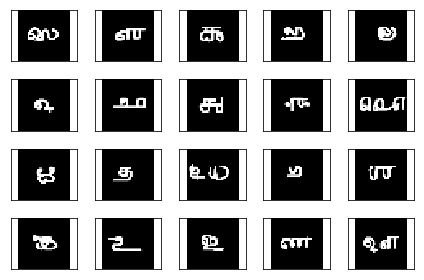

In [26]:
x_backgroud = np.array([data.imgs[0] for data in dataset_negative])
label_backgroud = np.array([data.label for data in dataset_negative])
x_positive = np.array([data.imgs[0] for data in dataset_train_positive])
label_positive = np.array([data.label for data in dataset_train_positive])

images_train_total = np.concatenate((x_backgroud ,x_positive)) 
label_total = np.concatenate((label_backgroud , label_positive))
print(images_train_total.shape)
print(label_total)
print(shufindex)
imgs_show(np.squeeze(images_train_total[0:20]),4,5)

[159 687 486 843  27 253 909 295 912 714 307 661 858  79 717 122  51 631
 828  20]


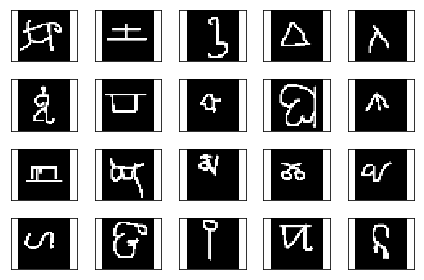

In [27]:

# print(x_p.shape)
print(label_positive)
imgs_show(np.squeeze(x_positive),4,5)

In [28]:
batch_size = len(images_train_total)
# lables = np.array([index for index in range(class_total_num)])
lables = torch.from_numpy(label_total).long().to(device)
print("get_log_mean_var ,labels = ", lables)
y_onehot = torch.FloatTensor(batch_size, class_total_num).cuda()
y_onehot.zero_()
y_onehot.scatter_(1, lables.view(-1, 1), 1)

mean,var = net_auto.get_log_mean_var(batch_size,y_onehot)

get_log_mean_var ,labels =  tensor([847, 118, 364, 239,  76, 936, 621, 275, 121, 312, 380, 298, 727, 145,
        251, 891, 586, 723, 115, 212, 406,  62, 724, 605, 155, 223, 811, 289,
        384, 525, 157, 874, 363, 627, 817, 197, 407,  28, 261, 452, 709, 194,
        758, 388,  45, 499, 225, 574, 545, 492, 904, 425, 305, 152, 837,  91,
        550, 143, 176,  64, 859, 389, 536, 730, 332, 760, 397, 463, 750, 803,
         98, 423, 303, 741, 613, 857, 881, 711, 488,  72, 886, 882, 215, 430,
        861, 812, 623, 381, 338, 840,  35, 171, 676, 576, 692, 693, 284, 755,
        911, 924, 241, 188, 635, 270, 774, 790, 772, 376, 201,  26, 453, 785,
        875, 634, 527, 718, 299,   6, 679, 373, 517, 409, 944, 530, 149, 656,
        437,   9, 480, 141, 103, 467,  30, 537, 905, 705, 689, 626, 593, 643,
        322, 893, 779, 140, 639, 218, 824, 759, 834, 277, 429, 512, 644, 444,
        976, 748, 776, 742, 445, 313, 321, 594, 200, 712, 206, 473, 501, 285,
        673, 975,  22, 971, 170, 565

In [29]:
std = torch.exp(var.cpu()).detach().numpy()

In [31]:
print(std[0,:,0,0])
print('std_mean =  ',np.sqrt(std_mean[:,0,0]))

[  3.43452525   2.48560023   2.37118077   1.36430883   2.21199608
   3.8233912    2.25390935   2.59097123  16.39452553  19.4696579
   2.41842413   1.4237529    2.3412571    2.22198796   2.54371953
  15.24213505  14.10566044  16.73625183   2.15052152  10.88203621
   2.38805056   2.32400513  13.53616905  11.21192169   8.83887577
   3.35371375  18.73184776  13.31815624   2.30527997   2.15223265
   2.26855135   2.49457717  20.31362343   2.44005275   2.69826317
   2.6883266   14.84571075  16.69184685   2.41959047   2.483325
   2.48602033   2.37172437   2.12908173  18.7699585    6.72724104
  14.65149212   2.33368301   8.49498558  16.65250397  15.21698284
   2.44246411  16.14128304   2.32893705   2.60682273   7.6408186
   2.38216877   4.48704195   2.82384801   2.42309451   3.04238415
  18.63186646  17.28856277  19.62948227   2.54505968]


NameError: name 'std_mean' is not defined

In [32]:

mean_x = mean.cpu().detach().numpy()
# mean_y = np.ones_like(mean_x)
color = (mean_x + 1 ) * 150
# print(mean_x[-7,:,0,0])

In [33]:
print(mean_x[:,0,0,0])

[  8.91238898e-02   6.78373054e-02  -1.16505429e-01  -4.12332974e-02
   1.29550034e-02  -5.11734420e-03  -1.08640501e-02   1.24456078e-01
  -1.14165813e-01   1.24427751e-01  -9.49196890e-02  -2.14702979e-01
  -1.01293899e-01  -1.37930794e-03   1.40509635e-01  -1.97035059e-01
   3.11936755e-02  -2.58244313e-02   8.57597217e-03   5.50448895e-02
  -7.16113020e-03  -1.12540253e-01   1.36870369e-01   3.48694511e-02
  -4.41218540e-02   8.14620554e-02   1.54176995e-01   2.05579754e-02
  -4.32684924e-03  -1.36177018e-01   3.34404893e-02   9.14830342e-02
  -9.83024016e-02  -1.39327794e-01  -2.78846193e-02  -8.09449181e-02
   1.49798691e-02   1.51855156e-01   1.41941542e-02  -1.19289532e-01
   1.11536227e-01   1.19537368e-01   5.55101410e-03  -5.27455360e-02
   1.09907217e-01   1.18947387e-01  -8.63671973e-02   1.21918127e-01
  -1.34060532e-02  -9.94620752e-03  -1.13030314e-03  -6.39760494e-02
  -1.06717460e-01   2.24011168e-02   1.30248696e-01  -1.49579599e-01
   1.56248152e-01  -3.13487239e-02

In [34]:
u_total = np.mean(mean_x,axis=0)
print('u_total =  ',u_total[:,0,0])
std_mean = np.mean(np.square(std),axis=0)
print('std_mean =  ',std_mean[0,0,0])
ui_squ_mean = np.mean(np.square(mean_x),axis=0)
print('ui_squ_mean =  ',ui_squ_mean.shape)
u_total_sque = np.square(u_total)
print('u_total_sque =  ',u_total_sque.shape)
std_squ_total = std_mean + ui_squ_mean - u_total_sque

print('std_squ_total =  ',std_squ_total.shape)
print('std__total = ',np.sqrt(std_squ_total)[:,0,0])

u_total =   [ -2.82857381e-02  -1.64808538e-02  -5.98705886e-03  -1.63688450e+01
  -1.26734842e-02   9.30761769e-02  -1.90683845e-02  -5.07419482e-02
  -4.77001071e-01  -3.64587694e-01   2.26194430e-02  -7.98563576e+00
   1.24003803e-02  -7.87940249e-03   1.17221521e-03  -1.78239476e-02
  -7.60035694e-01   1.36001146e+00   7.75953196e-03   6.08574033e-01
  -6.22193925e-02  -2.09557451e-02   1.44145727e+00   8.43957782e-01
   3.08903400e-02   1.00543536e-02   4.28285646e+00  -1.63958013e+00
   1.14725223e-02   1.35996146e-02   4.58160639e-02   4.73357104e-02
  -1.53928089e+00  -9.32145223e-04  -6.09728023e-02   1.96218789e-02
  -4.31121700e-02   9.39513445e-01   8.30067508e-03   7.95907807e-04
   5.47026768e-02  -4.95392829e-02   2.32292265e-02   4.61304456e-01
  -2.28304863e-02  -9.95789111e-01   2.53636334e-02  -9.05185282e-01
  -2.29790777e-01   1.10498714e+00  -2.24231239e-02  -6.16024733e-01
   5.32797687e-02  -4.27369177e-02  -2.94968724e-01   1.68127194e-02
  -4.44927951e-03   9.

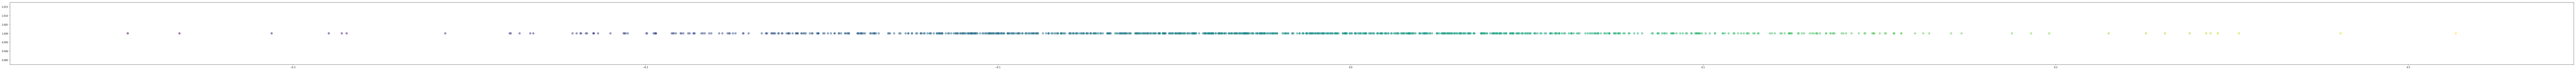

In [35]:
plt.figure(figsize=(200,5))

# my_y_ticks = np.arange(-0.1, 0.1, 0.01)
# plt.yticks(my_y_ticks)

plt.scatter(x = mean_x[:,0,0,0],y = np.ones_like(mean_x[:,0,0,0]),s=75,c =color[:,0,0,0],  alpha=.5)
plt.show()

In [ ]:
criterion = nn.MSELoss(reduction='sum')
ones_tensor = torch.ones((1, 32, 32)).float().cuda()

from scipy import misc
import time

In [ ]:
# net_auto.load_state_dict(torch.load('model_glow_ominst2000.pt'))


# use_cuda = torch.cuda.is_available()
# torch.manual_seed(666)
# device = torch.device("cuda" if use_cuda else "cpu")
# net_auto.to(device)
# net_auto.float()
# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_no_z_mean_no_add_normal1223.pt'))

# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_8k_9000.pt'))
# net_auto.train()
# torch.save(net_auto.state_dict(),'model_glow_ominst_all_bg_8k_20_way_778.pt')

def sample_and_save(sample_p,p,sampe_index_num):
    
    sample_n = np.random.randint(964)
#     sample_index = np.random.randint(18)
    sample_index = np.random.permutation(20)[:2]
    
    print('sample_p = {},sample_n ={}, sample_index = {}'.format(sample_p,sample_n,sample_index))

    posi = np.concatenate(( np.array(dataset_train_positive[sample_p].imgs)  ,  np.array(dataset_negative[sample_n].imgs)[sample_index]   ))
    labl =  np.array([dataset_train_positive[sample_p].label, dataset_negative[sample_n].label,dataset_negative[sample_n].label])
    print(dataset_train_positive[sample_p].name)
    save_path = dataset_train_positive[sample_p].name.split('/home/hyshuai/workspace/dataset/images_evaluation/')[1]
    save_path = './generate_img/' + str(save_path)
    
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    print(save_path)
    
    inputs ,lables = torch.from_numpy(posi).float().to(device),\
                torch.from_numpy(labl).long().to(device)

    y_onehot = torch.FloatTensor(3, class_total_num).to(device)
    y_onehot.zero_()
    y_onehot.scatter_(1, lables.view(-1,1), 1)
    # print('y_onehot:', y_onehot)
    # z, det, y_logits = net_auto(x=inputs, y_onehot=y_onehot)
    z, det = net_auto(x=inputs, y_onehot=y_onehot)
    y_logits = net_auto.class_flow(z)
    
    
    obj = z[0] 
    nn_index = [-1,1]
#     print(torch.sum(torch.abs(z[2]),dim =(1,2)))
#     print(torch.sum(torch.abs(z[1]),dim =(1,2)))

#     print(torch.sum(torch.abs(z[0]),dim =(1,2)))
    #         p = np.random.normal(loc=0.5,scale=0.1)
    q = np.random.randint(0, 2)
    scale = nn_index[q] * p
    # print('scale = ', scale)
#     start_index = np.random.randint(0,44)
    # start_index = 0
#     end_index = start_index + 20

    slic_index = np.random.permutation(64)[:sampe_index_num]
#     print(slic_index) 

#     print('scale = {},start_index ={}, end_index = {}'.format(scale,start_index,end_index))
    # obj[start_index:end_index] = obj[start_index:end_index] + scale * (z[1][start_index:end_index] - z[2][start_index:end_index])
    obj[slic_index] = obj[slic_index] + scale * (z[1][slic_index] - z[2][slic_index])

    # print(obj.size())
    obj = obj.view(-1,*obj.size())
    # print(obj.size())
    obj_oneshot = y_onehot[0].view(-1,class_total_num)
    
    
    
    x_ = net_auto(z = obj,y_onehot = obj_oneshot,eps_std = None ,reverse=True)

    x_ = torch.clamp(x_,-1,1)
    
    diffrent_b = criterion(x_[0] , inputs[0]) / criterion(inputs[0],ones_tensor)
    print(' diffrent_b = ',diffrent_b)

    c_self = criterion(inputs[0],ones_tensor)
    
    x_ = np.squeeze(x_.data.cpu().numpy())
#     print(x_.shape)
    tt = int(round(time.time() * 1000))
    misc.imsave(save_path+"/"+str(tt)+"_"+str(diffrent_b.data.cpu())+ ".png",x_)
#     x_ = cv2.imwrite()
    

    



In [ ]:
# for i in range(14,20):

#     for _ in range(10000):

#         sample_and_save(i,0.5,64)

In [ ]:
sample_p = 13 # np.random.randint(20)  # 10 # 
sample_n =   np.random.randint(964)
sample_index = np.random.randint(18)
print('sample_p = {},sample_n ={}, sample_index = {}'.format(sample_p,sample_n,sample_index))

posi = np.concatenate(( np.array(dataset_train_positive[sample_p].imgs[0:1])  ,  np.array(dataset_negative[sample_n].imgs[sample_index:sample_index+2])   ))
labl =  np.array([dataset_train_positive[sample_p].label, dataset_negative[sample_n].label,dataset_negative[sample_n].label])
print(dataset_train_positive[sample_p].name)
inputs ,lables = torch.from_numpy(posi).float().to(device),\
            torch.from_numpy(labl).long().to(device)
        
y_onehot = torch.FloatTensor(3, class_total_num).to(device)
y_onehot.zero_()
y_onehot.scatter_(1, lables.view(-1,1), 1)
# print('y_onehot:', y_onehot)
# z, det, y_logits = net_auto(x=inputs, y_onehot=y_onehot)
z, det = net_auto(x=inputs, y_onehot=y_onehot)
y_logits = net_auto.class_flow(z)


print('z.size() ' ,z.size())
print('y_logits.size() ' ,y_logits.size())
print(y_logits[1][1])

In [ ]:
# divider =z[1]-z[2] 
# print(divider[0])
# print(z[1][0])
# print(z[2][0])

In [ ]:
obj = z[0]
# print(obj[0])
obj = z[0] 
nn_index = [-1,1]
# print(torch.sum(torch.abs(z[2]),dim =(1,2)))
# print(torch.sum(torch.abs(z[1]),dim =(1,2)))

# print(torch.sum(torch.abs(z[0]),dim =(1,2)))
p =  0.2 # np.random.uniform(0.5, 0.8)
#         p = np.random.normal(loc=0.5,scale=0.1)
q = np.random.randint(0, 2)
scale =  nn_index[q] * p
# print('scale = ', scale)
# start_index = np.random.randint(0,44)
start_index = 0
end_index = start_index + 64

slic_index = np.random.permutation(64)[:10]
print(slic_index) 

print('scale = {},start_index ={}, end_index = {}'.format(scale,start_index,end_index))
divider =  scale *  (z[1][start_index:end_index] - z[2][start_index:end_index])
print('divider = ', divider)
print('obj = ', obj)
obj[start_index:end_index] = obj[start_index:end_index] + divider
# obj[slic_index] = obj[slic_index] + scale * (z[1][slic_index] - z[2][slic_index])

# print(obj.size())
obj = obj.view(-1,*obj.size())
# print(obj.size())
obj_oneshot = y_onehot[0].view(-1,class_total_num)
# print(obj_oneshot.size())
# print(obj_oneshot)
# print(obj[0][0])

In [ ]:
# z = z.detach().cpu().numpy()
# print(z.size())
# print(z[0][0][0])
x_ = net_auto(z = obj,y_onehot = obj_oneshot,eps_std = None ,reverse=True)

x_ = torch.clamp(x_,-1,1)
print(x_.size())

print("abs sum = ",torch.sum(torch.abs(x_[0] - inputs[0])))
# print("abs sum = ",torch.sum(x_[0]- inputs[0]))
c = criterion(x_[0] , inputs[0])
print("criterion sum   = ",c)

c_self = criterion(inputs[0],ones_tensor)
print("self criterion sum  = ",c_self)
dd =  torch.sum(torch.mul(x_[0],inputs[0]))
print("  sum  = ",  dd )
m1 = torch.norm(x_[0])
print("  sum  = ",  m1 )
m2 = torch.norm(inputs[0])
print("  sum  = ",  m2 )

# l2_self = torch.sum(np.square(x_[0] - inputs[0]))
# print("l2_self sum  = ",l2_self)

print("l2  bi li   = ",c / c_self)
print("cos distance   = ",dd  / (m1 * m2) )

In [ ]:
img_show(np.squeeze(x_.data))
img_show(np.squeeze(inputs.data[0]))
imgs_show(np.squeeze(inputs.data),1,3)

In [ ]:
train_img_list = [data.imgs for data in dataset_train_positive]
train_name_list = [data.name for data in dataset_train_positive]
imgs_show(np.squeeze(np.array(train_img_list)),4,5)
print(train_name_list)

In [ ]:
def img_show(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')

In [ ]:
# import seaborn as sns
# sns.set_style('darkgrid')
# sns.set_palette('muted')
# sns.set_context("notebook", font_scale=1.5,
# rc={"lines.linewidth": 2.5})

label_class = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
tsne = TSNE(n_components=2, init='pca', random_state=501)
X = np.squeeze(np.array(train_img_list))

X = np.reshape(X,(-1,32 * 32))
print(X.shape)
result = tsne.fit_transform(X)

t0 = time()

fig = plot_embedding(result, test_class_index,'t-SNE embedding of the digits (time %.2fs)'% (time() - t0))
plt.show(fig)

In [ ]:
# plt.axis([0, 1000, 0, 1])
# plt.ion()
 
# while True:
#     x = []
#     y = []
#     for i in range(512):
#         x.append(i)
#         y.append(np.random.random())
#         # plt.pause(0.05)
#     plt.cla()
#     plt.plot(x, y)
#     plt.pause(0.033)


In [ ]:
dataaaaaaa = get_next_perfect(dataset_train_positive,dataset_negative,8,126)

z_list = []
labels_list = []
for x ,y in dataaaaaaa:
    inputs, labels = Variable(torch.from_numpy(x).float()).cuda(), Variable(torch.from_numpy(y).long()).cuda()
    print(labels)
    z, det = net_auto(x=inputs, y_onehot=None)
    z_list.append(z.data.cpu())
    labels_list.append(y)
print(len(z_list))
print(len(labels_list))
    


In [ ]:
z_array = np.concatenate(z_list)
print(z_array.shape)
labels_array = np.concatenate(labels_list)
print(labels_array.shape)

In [ ]:
z_review = np.reshape(z_array,(-1,64 * 4 * 4))
print(z_review.shape)

In [ ]:
def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure(figsize=(50,50))
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 989.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=666)

result_z = tsne.fit_transform(z_review[:2000])

t0 = time()



In [ ]:
# print()
fig = plot_embedding(result_z, labels_array[:2000],'t-SNE embedding of the digits (time %.2fs)'% (time() - t0))
plt.show(fig)